<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex02)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 환자 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn에서 지원해주는 학습용 유방암 데이터셋 임포트
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- 문제, 정답 분리

In [ ]:
X = data['data']
y = data['target']

In [ ]:
X.shape, y.shape

((569, 30), (569,))

- 학습, 평가 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

## 인공신경망 구성
1. 신경망 구조 설계
2. 학습 및 평가방법 설정
3. 학습 + 시각화
4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential # 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras.layers import Dense # 신경망 층(뉴런의 묶음)을 구성해주는 함

In [ ]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model = Sequential()

# 입력+중간층 설정
model.add(Dense(50, input_dim=30, activation='sigmoid'))

# 중간층 추가 (층마다 활성화함수 다르게 가능)
model.add(Dense(100, activation='sigmoid')) # 하나의 층
model.add(Dense(50, activation='sigmoid')) # 하나의 층
model.add(Dense(10, activation='sigmoid')) # 하나의 층

# 출력층 설정 (출력층은 문제의 종류에 따라서 고정됨)
# 2진분류 문제는 출력층 뉴런 개수 1개, 활성화함수는 sigmoid로 고정
model.add(Dense(1, activation='sigmoid'))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                1550      
                                                                 
 dense_23 (Dense)            (None, 100)               5100      
                                                                 
 dense_24 (Dense)            (None, 50)                5050      
                                                                 
 dense_25 (Dense)            (None, 10)                510       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________


## activation(활성화함수) - 자극에 대한 반응여부와 그 정도를 결정하는 함수
1. 회귀 : linear(선형함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
(신경망은 회귀모델을 기반으로 동착하기 때문)
2. 분류 : 인공신경망은 선형회귀 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치값으로는 분류 문제를 풀기 힘듦
  - 이진분류 : sigmoid함수를 통해서 최종적으로 0 or 1로 분류를 해낼 수 있음

In [ ]:
# 2. 신경망 학습 및 평가방법 설정
# 손실함수(비용함수), 최적화함수, 평가방법 설정
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 0.7285 - acc: 0.4202
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6562 - acc: 0.6338
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6498 - acc: 0.6338
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6455 - acc: 0.6338
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6385 - acc: 0.6338
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6304 - acc: 0.6338
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6192 - acc: 0.6338
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5990 - acc: 0.6338
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5669 - acc: 0.6831
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5262 - acc: 0.8944
Epoch 11/200
14/14 [==============================] - 0s 2m

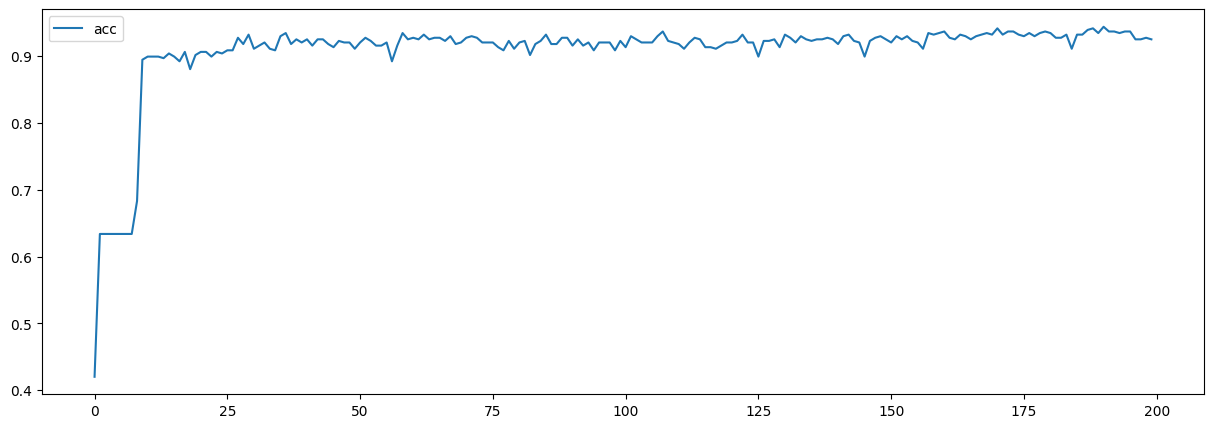

In [ ]:
# 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

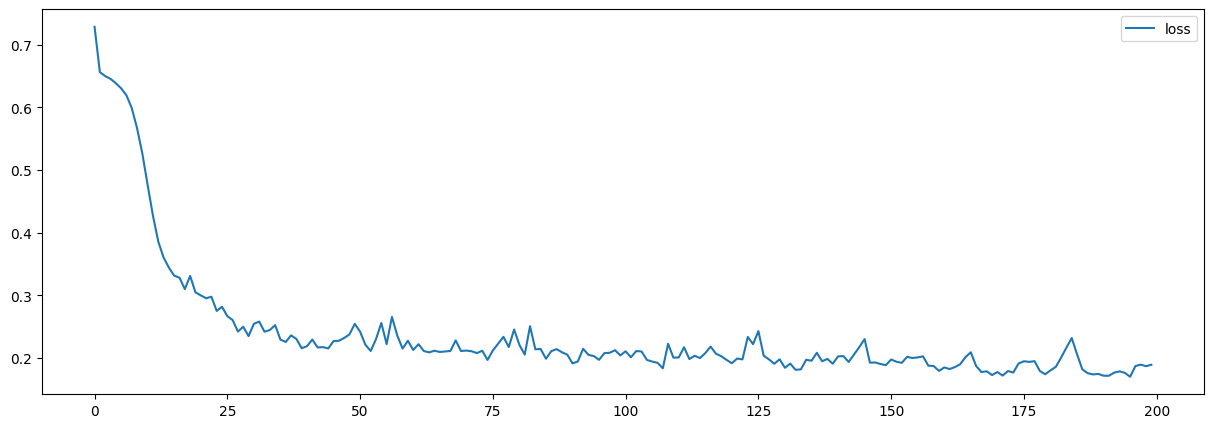

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1473 - acc: 0.9441


[0.14732201397418976, 0.9440559148788452]

- 학습시킬 때 optimizer를 SGD가 아닌 Adam으로 변경 => 정확도가 0.6에서 0.94로 증가